In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Initialize an empty list to store the dataframes
dataframes = []
nv_error_1 = np.array([])
v_error_1 = np.array([])
nv_error_2 = np.array([])
v_error_2 = np.array([])
nv_error_3 = np.array([])
v_error_3 = np.array([])
zero_vect = np.zeros(30)
p_num = 1
# Loop through the range of numbers corresponding to your file names
for i in range(1, 19):  # Assuming your files are numbered from 1 to 6
    # Construct the file name
    if i % 2 == 0:
        if i <  7:
            file_name = f'../data/p{p_num}/p{p_num}_tf_{i}.csv'
            df = pd.read_csv(file_name)
            v_error_1 = np.append(v_error_1, df['error'].to_numpy())
            nv_error_1 = np.append(nv_error_1, zero_vect)
        elif i > 6 and i < 13:
            file_name = f'../data/p{p_num}/p{p_num}_tf_bv_{i}.csv'
            df = pd.read_csv(file_name)
            v_error_2 = np.append(v_error_2, df['error'].to_numpy())
            nv_error_2 = np.append(nv_error_2, zero_vect)
        elif i > 12:
            file_name = f'../data/p{p_num}/p{p_num}_tf_of_{i}.csv'
            df = pd.read_csv(file_name)
            v_error_3 = np.append(v_error_3, df['error'].to_numpy())
            nv_error_3 = np.append(nv_error_3, zero_vect)

        df['Block_Number'] = i
        dataframes.append(df)
    else:
        if i <  7:
            file_name = f'../data/p{p_num}/p{p_num}_nf_{i}.csv'
            df = pd.read_csv(file_name)
            nv_error_1 = np.append(nv_error_1, df['error'].to_numpy())
            v_error_1 = np.append(v_error_1, zero_vect)
        elif i > 6 and i < 13:
            file_name = f'../data/p{p_num}/p{p_num}_nf_bv_{i}.csv'
            df = pd.read_csv(file_name)
            nv_error_2 = np.append(nv_error_2, df['error'].to_numpy())
            nv_error_2 = np.append(v_error_2, zero_vect)
        elif i > 12:
            file_name = f'../data/p{p_num}/p{p_num}_nf_of_{i}.csv'
            df = pd.read_csv(file_name)
            nv_error_3 = np.append(nv_error_3, df['error'].to_numpy())
            v_error_3 = np.append(nv_error_3, zero_vect)

        df['Block_Number'] = i
        dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

C:\Users\gesch\AppData\Local\Temp\ipykernel_41508\4148319707.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


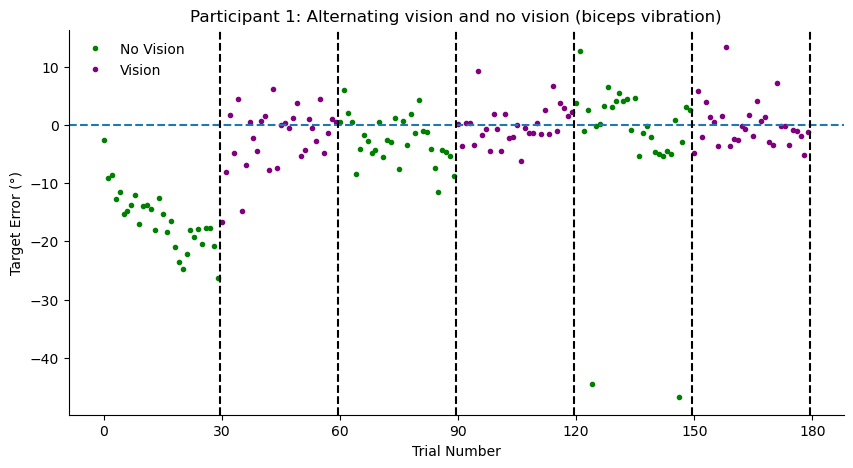

In [7]:
nv_error_base = np.ma.masked_equal(nv_error_1,0)
v_error_base = np.ma.masked_equal(v_error_1,0)

nv_error_vib = np.ma.masked_equal(nv_error_2,0)
v_error_vib = np.ma.masked_equal(v_error_2,0)

nv_error_offset = np.ma.masked_equal(nv_error_3,0)
v_error_offset = np.ma.masked_equal(v_error_3,0)

fig, ax = plt.subplots(3,1, figsize=[10,5])
fig.suptitle(f'Participant {p_num}', fontsize=14, fontweight='bold')
ax[0].plot(nv_error_base, marker='.', linestyle='none', color='green', label='No Vision')
ax[0].plot(v_error_base, marker='.', linestyle='none', color='purple', label='Vision')
ax[0].axhline(0, linestyle='--')
for i in range(1,7):
    ax.axvline((30*i)-0.5, linestyle='--', color='black')
ax[0].set_title('No perturbation')
ax[0].set_ylabel(f'Target Error (\u00B0)')
ax[0].set_xlabel('Trial Number')
ax[0].spines['top'].set_visible(False)  # Remove top spine
ax[0].spines['right'].set_visible(False)  # Remove right spine
ax[0].legend(frameon=False)
ax[0].set_xticks([0, 30, 60, 90, 120, 150, 180])
ax[0].set_xticklabels([0, 30, 60, 90, 120, 150, 180])
fig.show()
# fig.savefig(f'../results/p_{p_num}.png', dpi=1000)